Features: 

	    Year  Present_Price  Kms_Driven
0  2014           5.59       27000
1  2013           9.54       43000
2  2017           9.85        6900
3  2011           4.15        5200
4  2014           6.87       42450
5  2018           9.83        2071
6  2015           8.12       18796
7  2015           8.61       33429
8  2016           8.89       20273
9  2015           8.92       42367


 Dimentions of Feature: 

	 (301, 3)


 Target values: 

	    Selling_Price
0           3.35
1           4.75
2           7.25
3           2.85
4           4.60
5           9.25
6           6.75
7           6.50
8           8.75
9           7.45


 Dimentions of Target: 
	 (301, 1) 


-----Shapes-----
Training Data:  (210, 3) (210, 1)
Testing Data:  (91, 3) (91, 1) 


-------Predictions--------
 [ 1.45  9.65  2.9   7.45  7.45  5.8   0.2   4.5   2.    2.85 10.9   5.25
  4.5   4.    6.7   7.25 19.75  2.9   3.95  3.75  5.5   1.11  6.85  4.5
  6.6   0.48  0.35  4.75 23.    2.    0.6   0.45  5.2  

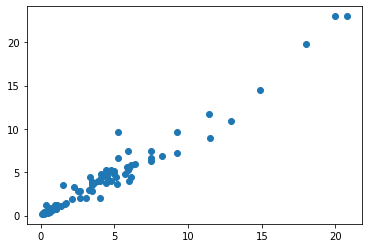

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor  
import pickle

#Features 
data = pd.read_csv("car data.csv",usecols=[1,3,4])
print('Features:','\n\n\t',data.head(10))
print('\n\n Dimentions of Feature:','\n\n\t',data.shape)

#Targets 
data2 = pd.read_csv("car data.csv",usecols=[2])
print('\n\n Target values:','\n\n\t',data2.head(10))
print('\n\n Dimentions of Target:','\n\t',data2.shape, '\n\n')

#Splitting the test data from the dataset first
X_train, X_test, y_train, y_test = train_test_split(data, data2, test_size=0.30) 

#Dimenstions of the Split Dataset
print('-----Shapes-----')
print('Training Data: ', X_train.shape, y_train.shape)
print('Testing Data: ', X_test.shape, y_test.shape, '\n\n')

#Creating the model
Model = DecisionTreeRegressor(random_state = 0)

#converting to numpy arrays
Xtr = np.array(X_train)
ytr = np.array(y_train)

Xte = np.array(X_test)
yte = np.array(y_test)

#Fitting the model to the data
Model.fit(Xtr, ytr)

#Making Predictions on the fitted model
predictions = Model.predict(Xte)
print('-------Predictions--------\n',predictions,'\n')

#Evaluating the model's performance
r_square = Model.score(Xtr, ytr)
print('\n\nModel Evaluation Score (On Training Data): ', r_square)
r_square_testD = Model.score(Xte, yte)
print('\nModel Evaluation Score (On Testing Data): ', r_square_testD)

#Plotting the predictions
plt.scatter(yte, predictions)
plt.show()

In [4]:
#Saving the model for future use
filename = 'automobile-price-prediction-DTRegressor-model.pkl'
pickle.dump(Model, open(filename, 'wb'))